## Logistic Regression by Up Sampling the Dataset and K fold Cross Validation

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [2]:
dataset = pd.read_csv("creditcard.csv")
X = dataset.iloc[:, :-1].values
#X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


# proportion of Each Class

In [4]:
target_count = dataset.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1


### Dividing the dataset to test train 


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(X_train.shape)
print(y_train.shape)

(227845, 30)
(227845,)


# Applying Up Sampling for training purposes

In [7]:
OS = RandomOverSampler(0.50)
X_train_OS, y_train_OS = OS.fit_sample(X_train,y_train)
occurrences0 = np.count_nonzero(y_train_OS == 0)
occurrences1 = np.count_nonzero(y_train_OS == 1)
print(occurrences0)
print(occurrences1)

227454
113727


C:\Users\H P\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


## Sacling the values by using standardization

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_OS)
X_test = sc.transform(X_test)

## Implementating the Logistic Regression Classifier on Upsampled data

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train_OS,y_train_OS)

C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Getting Predictions

In [10]:
y_pred = classifier.predict(X_test)

### Accuracy,Confusion Matrix and Classification Report

In [51]:
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56675   186]
 [   11    90]]
0.9965415540184684
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.33      0.89      0.48       101

    accuracy                           1.00     56962
   macro avg       0.66      0.94      0.74     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

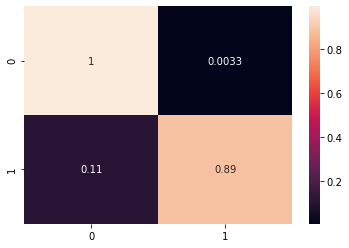

In [52]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)

## Cross Validation 

In [12]:
accuracies = cross_val_score(estimator = classifier, X = X_train_OS, y = y_train_OS, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Accuracy: 94.97 %
Standard Deviation: 0.84 %


C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Grid Search for Finding Hyper Parameters

In [13]:
parameters=[{'penalty':['l1','l2'],'C':[0.25,0.5,0.75,1]}]
grid_search = GridSearchCV(estimator=classifier,
                           param_grid = parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

In [14]:
grid_search.fit(X_train_OS,y_train_OS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.9492410023021582
{'C': 0.75, 'penalty': 'l2'}


C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
classifier = LogisticRegression(C= 0.75, penalty= 'l2')
classifier.fit(X_train_OS,y_train_OS)

C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.75)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56604   257]
 [   17    84]]
0.9951897756399003
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.25      0.83      0.38       101

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.69     56962
weighted avg       1.00      1.00      1.00     56962



# Random Forest Classifier

In [20]:
dataset = pd.read_csv("creditcard.csv")
X = dataset.iloc[:, :-1].values
#X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [21]:
X.shape

(284807, 30)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(227845, 30)
(227845,)


# Applying SMOTE

In [24]:
# Upsampling the data by using SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(y_train_res)

[0 0 0 ... 1 1 1]


In [25]:
zero_count = np.count_nonzero(y_train_res == 0)
one_count = np.count_nonzero(y_train_res == 1)
print(zero_count)
print(one_count)

227454
227454


In [26]:
classifier = RandomForestClassifier(n_estimators=120,criterion='entropy',random_state = 0,n_jobs=-1)
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=120, n_jobs=-1,
                       random_state=0)

In [27]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56847    14]
 [   14    87]]
0.9995084442259752
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.86      0.86      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

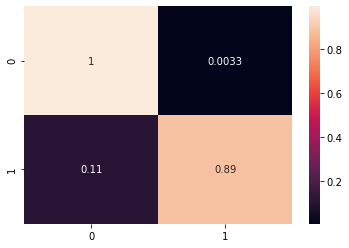

In [49]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)

### Cross Validation

In [28]:
accuracies = cross_val_score(estimator = classifier, X = X_train_res, y = y_train_res, cv = 10,n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.99 %
Standard Deviation: 0.00 %


## Grid SearchCV Hyper Parameter Tuning

In [29]:
random_grid={'bootstrap': [True],
 'max_depth': [30, 40],
 'min_samples_leaf': [1,4],
 'min_samples_split': [2, 5],
 'n_estimators': [150,200]}
# parameters=[{'penalty':['l1','l2'],'C':[0.25,0.5,0.75,1]}]
grid_search = GridSearchCV(estimator=classifier,
                           param_grid = random_grid,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

In [30]:
grid_search.fit(X_train_res,y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.9999032770881525
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#Grid SearchCV parameters.
0.9999032770881525
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

### Cross Entropy

In [35]:
classifier = RandomForestClassifier(n_estimators=200,criterion='entropy',min_samples_leaf= 1,random_state = 0,
                                    min_samples_split= 2,max_depth= 30,bootstrap= True, n_jobs=-1)
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56846    15]
 [   14    87]]
0.9994908886626171
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.85      0.86      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### GINI Entropy Loss

In [37]:
classifier = RandomForestClassifier(n_estimators=200,criterion='gini',min_samples_leaf= 1,random_state = 0,
                                    min_samples_split= 2,max_depth= 30,bootstrap= True, n_jobs=-1)
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=-1,
                       random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56847    14]
 [   15    86]]
0.9994908886626171
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.86      0.85      0.86       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# XG Boost Classifier

In [32]:
# Upsampling the data by using SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(y_train_res)

[0 0 0 ... 1 1 1]


In [33]:
classifier = XGBClassifier()
classifier.fit(X_train_res,y_train_res)

C:\Users\H P\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_names = ['class 0', 'class 1']
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[56843    18]
 [   14    87]]
0.9994382219725431
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     56861
     class 1       0.83      0.86      0.84       101

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

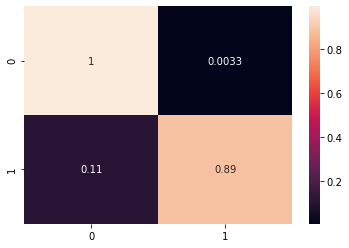

In [48]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)